In [63]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

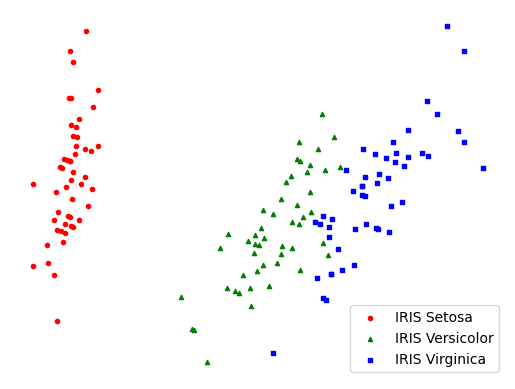

In [64]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :4] # we take full 4 features
Y = iris.target
# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa',
c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',
c='green', marker="^")

plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica',
c='blue', marker="s")
plt.legend()
plt.show()

In [65]:
import sklearn
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm,Y,test_size=0.2,random_state=42)

In [67]:
from scipy import sparse
C = 3
def convert_labels(y, C = C):
    """
    convert 1d label to a matrix label: each column of this
    matrix coresponding to 1 element in y. In i-th column of Y,
    only one non-zeros element located in the y[i]-th position,
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

    [[1, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

    # Y = convert_labels(y, C)

def softmax_stable(Z):
    """

    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax(Z):
    """
    #Compute softmax values for each sets of scores in V.
    #each column of V is a set of score.
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)

    return W

# cost or loss function
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

# Predict that X belong to which class (1..C now indexed as 0..C-1 )
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X.T))
    return np.argmax(A, axis = 0)

In [68]:
one_train = np.ones((X_train.shape[0], 1))
Xbar_train = np.concatenate((one_train, X_train), axis = 1)

In [69]:
np.random.seed(0)
eta = .05
d = Xbar_train.shape[0]
W_init = np.random.randn(d, C)
W = softmax_regression(Xbar_train, Y_train, W_init, eta)
print(W[-1])

[[ 1.18328033  0.98495617  0.97471104]
 [ 1.21612366  2.90413713 -0.98908748]
 [ 1.07443161 -0.22518107 -0.15373818]
 [-0.02363103  0.58230331  1.4502433 ]
 [ 0.44217641  0.44455296  0.4398466 ]
 [ 0.95543731  0.94217636 -0.27501854]
 [ 0.37977476 -0.86640689 -2.60738572]
 [ 0.16859302  1.3534941  -0.74619735]
 [ 1.70849151 -0.88906812  0.04172408]
 [-1.09649754  2.4422784   1.46917328]
 [ 0.621906   -0.01892596 -0.95765584]
 [-2.04372284 -0.2267112   0.09807439]
 [ 1.3781125   1.10895369 -0.44172248]
 [-1.00546664 -0.33360312 -1.43180389]
 [-2.3170554   2.5656009  -0.51369247]
 [ 0.01449673 -1.67037092  0.74249489]
 [-1.27912892 -0.49311801 -0.94985776]
 [ 0.59180249 -0.64968234 -1.24665497]
 [ 0.15904078  0.29162421  0.01600187]
 [ 0.36048933 -0.59919055 -0.45589014]
 [-0.47912127 -0.50625545 -0.85978317]
 [-1.3316697  -0.13953519 -0.4794325 ]
 [-1.46317315  0.35014499 -0.96168629]
 [-0.4379574   1.22302382  0.12495246]
 [ 1.65156324 -1.67321362  0.32856688]
 [-0.41833062 -1.10226172

In [70]:
one_test = np.ones((X_test.shape[0], 1))
Xbar_test = np.concatenate((one_test, X_test), axis = 1)

In [72]:
# pred(W[-1], Xbar_test)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
iris=load_iris()
# print(iris)
X=iris.data # Observed variable
Y=iris.target # Dependent variable (label)#print(X.shape)
#print(Y.shape)
# Splitting Train and test Data
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.2,
random_state=2)
#sc=StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.transform(X_test)
# Call to Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient
lorg=LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)
# and train model by Training Dataset
lorg.fit(X_train,Y_train)
# Then Predict the Test data
Y_pred=lorg.predict(X_test)
# for accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))
# for confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
